In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy.interpolate import griddata
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)



pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


cuda:0


In [2]:
global temp_list
temp_list = []
Agent_number_n=3;
Alpha = 1.0;

echo = 5 
BATCH_SIZE = 64
LR = 0.001           # learning rate for generator

normalloc = 0.3
normalscale = 0.1
def Generate_distribution(Agent_number_n):
    #return np.random.rand(Agent_number_n)
    return np.random.normal(normalloc,normalscale,Agent_number_n)


In [3]:
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(100000):
        appen_train(sorted(Generate_distribution(Agent_number_n), reverse=True));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
    for i in range(10000):
        appen_test(sorted(Generate_distribution(Agent_number_n), reverse=True));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.27743737 0.17708314]
  [0.48286706 0.17708314]
  [0.48286706 0.27743737]]

 [[0.34075418 0.19669726]
  [0.35728234 0.19669726]
  [0.35728234 0.34075418]]

 [[0.31204806 0.19601582]
  [0.39646931 0.19601582]
  [0.39646931 0.31204806]]

 ...

 [[0.2811544  0.24208524]
  [0.31525749 0.24208524]
  [0.31525749 0.2811544 ]]

 [[0.3869714  0.24957484]
  [0.40088299 0.24957484]
  [0.40088299 0.3869714 ]]

 [[0.31822503 0.22531468]
  [0.40679978 0.22531468]
  [0.40679978 0.31822503]]]
[[[0.16126281 0.15950377]
  [0.29914968 0.15950377]
  [0.29914968 0.16126281]]

 [[0.21390235 0.18235687]
  [0.33128412 0.18235687]
  [0.33128412 0.21390235]]

 [[0.29817445 0.2462989 ]
  [0.4071409  0.2462989 ]
  [0.4071409  0.29817445]]

 ...

 [[0.3187926  0.30611134]
  [0.33195585 0.30611134]
  [0.33195585 0.3187926 ]]

 [[0.37685762 0.21253724]
  [0.38371735 0.21253724]
  [0.38371735 0.37685762]]

 [[0.29645233 0.17897104]
  [0.33545736 0.17897104]
  [0.33545736 0.29645233]]]
[1.         1.         1.   

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list),sum(result_list)/len(result_list))

2.3225277332651295 1.9999999999999996 0.32252773326512996 2.0265730119931353


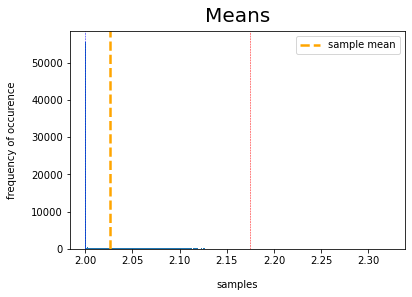

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
training_supervised_label=np.array(training_supervised_label)
print(training_supervised_label)

[[0.66666667 0.66666667 0.76030443]
 [0.66666667 0.66666667 0.69803651]
 [0.66666667 0.66666667 0.70851737]
 ...
 [0.66666667 0.66666667 0.66666667]
 [0.66666667 0.66666667 0.78785439]
 [0.66666667 0.66666667 0.72502482]]


In [7]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0, std=0.1)
        torch.nn.init.normal_(m.bias, mean=0.0, std=0.01)


class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()

        self.input_dim = (Agent_number_n-1)
        self.hidden_dim = 100
        self.output_dim = 1
        self.hidden_layer_count = 6

        current_dim = self.input_dim
        self.layers = torch.nn.ModuleList()
        for i in range(self.hidden_layer_count):
            self.layers.append(torch.nn.Linear(current_dim, self.hidden_dim))
            current_dim = self.hidden_dim
        self.layers.append(torch.nn.Linear(current_dim, self.output_dim))

    def calculate(self, value_list):
        h = value_list
        for layer in self.layers:
            h = torch.relu(layer(h))
        return h

    def forward(self, input_list, input_label, label):
        global iteration, echo, target_order
        loss1 = 0
        loss2 = 0
        
        input_list = torch.from_numpy(
            np.array(input_list)).to(dev).type(torch.float32)
        h_list = []

        for i in range(Agent_number_n):
            h = self.calculate(input_list[i])
            h_list.append(h)

        input_label = torch.from_numpy(
            np.array(input_label)).to(dev).type(torch.float32)
        sum_h = torch.sum(torch.cat(h_list)).to(dev)

        loss1 = torch.where((Agent_number_n-1)*input_label > sum_h,
                            torch.square(
                                ((Agent_number_n-1)*input_label-sum_h)),
                            torch.zeros(1).to(dev)
                            )

        loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                        torch.square((sum_h-(Agent_number_n-Alpha)*input_label))/10000,
                        torch.zeros(1).to(dev)
                      )

#         loss1 = torch.relu(((Agent_number_n-1)*input_label-sum_h))

#         loss2 = torch.relu((sum_h-(Agent_number_n-Alpha)*input_label))/10000

        return loss1, loss2, h_list

In [8]:
random.seed(2000)
torch.manual_seed(256)
net  = Net()
net.apply(weight_init)

#net = torch.load("save/Deep_learning_normal_3")
net.to(dev)
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00005)
optimizer = opt.Adam(net.parameters(), lr=LR)
#optimizer = opt.Adadelta(net.parameters(), lr=1.0)
print(net)

Net(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Linear(in_features=100, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Linear(in_features=100, out_features=100, bias=True)
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)


In [9]:
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        
        loss2_list = []
        loss1_sum = 0
        loss2_sum = 0
        denominator = 0
        for index in range(temp_number, min(BATCH_SIZE+temp_number,len(training_data))):
            h_loss1,h_loss2,h_list = net(training_data[index],training_label[index],0)
            denominator += 1
            loss1_sum += h_loss1
            loss2_sum += h_loss2
            
        loss_sum = loss1_sum + loss2_sum
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.01):
            print(temp_number,loss,float(loss1_sum),float(loss2_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()
    print()

3024 tensor([0.0051], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.3268827795982361
4347 tensor([0.0033], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.2113741785287857


KeyboardInterrupt: 

In [ ]:
torch.save(net, "save/Deep_learning_normal_1_3")

In [ ]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list),sum(result_list)/len(result_list))

In [ ]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [ ]:

# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Generate the values
x_vals = []
y_vals = []
z_vals = []
x_ = np.linspace(0.0,1.0,101)
y_ = np.linspace(0.0,1.0,101)

result_list = []
for i in range(len(x_)):
    for j in range(0,i):
        h = net.calculate(torch.tensor([x_[i],y_[j]]).cuda().type(torch.float32))
        x_vals.append(x_[i])
        y_vals.append(y_[j])
        z_vals.append(float(h))


# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')



plt.show()

In [ ]:
fig = px.scatter_3d(z=z_vals, x=x_vals, y=y_vals)

fig.show()

In [ ]:
# def h_function(input_list):

#     h = max(sum(input_list),2/3) + 1/2 * max(sum(input_list),1) - 1/2 * max(input_list[0],2/3) - 1/6
#     return h

def h_function(input_list):
    if(sum(input_list)>=2/3):
        h = sum(input_list)
    else:
        h = 2/3
    return h   
                
x_list2 = []
y_list2 = []
z_list2 = []
result_list = []
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list2.append(training_data[index][i][0])
        y_list2.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list2.append(float(h))
        h_list.append(float(h))
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list),sum(result_list)/len(result_list))
fig = px.scatter_3d(z=z_list2[:10000], x=x_list2[:10000], y=y_list2[:10000])

fig.show()

In [ ]:
# def h_function(input_list):

#     h = max(sum(input_list),2/3) + 1/2 * max(sum(input_list),1) - 1/2 * max(input_list[0],2/3) - 1/6
#     return h

def h_function(input_list):
    if(sum(input_list)>=2/3):
        h = sum(input_list)
    else:
        h = 2/3-sum(input_list)*1/16+1/24
    return h   
                
x_list2 = []
y_list2 = []
z_list2 = []
result_list = []
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list2.append(training_data[index][i][0])
        y_list2.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list2.append(float(h))
        h_list.append(float(h))
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list),sum(result_list)/len(result_list))
fig = px.scatter_3d(z=z_list2[:10000], x=x_list2[:10000], y=y_list2[:10000])

fig.show()

In [ ]:
# def h_function(input_list):

#     h = max(sum(input_list),2/3) + 1/2 * max(sum(input_list),1) - 1/2 * max(input_list[0],2/3) - 1/6
#     return h

def h_function(input_list):

    h = max(sum(input_list),2/3) + 1/2 * max(sum(input_list),1) - 1/2 * max(input_list[0],2/3) - 1/6
    return h   
                
x_list1 = []
y_list1 = []
z_list1 = []
result_list = []
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list1.append(training_data[index][i][0])
        y_list1.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list1.append(float(h))
        h_list.append(float(h))
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list),sum(result_list)/len(result_list))
fig = px.scatter_3d(z=z_list1[:10000], x=x_list1[:10000], y=y_list1[:10000])

fig.show()

In [ ]:
fig = px.scatter_3d(z=z_list[:10000], x=x_list[:10000], y=y_list[:10000])

fig.show()

In [ ]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Generate the values

# Plot the values
ax.scatter(x_list, y_list, z_list, c = 'b', marker='o')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

In [ ]:
o_frame = np.linspace(0.0,1.0,101)
    
#o* = argmax_o { (2 * theta_O - 400)(o-o*o/2) + (2 * theta_D - 15)(1-o)  }

grid_x, grid_y = np.mgrid[0:1:400j, 0:1:400j]

points =np.reshape([x_vals,y_vals],(2,-1))

points = np.transpose(points)

grid_z2 = griddata(points, z_vals, (grid_x, grid_y), method='nearest')


im =plt.imshow(grid_z2.T, extent=(0,1,0,1) , aspect='auto',interpolation='bilinear')
plt.colorbar(im)
plt.title('high')
plt.xlabel(r"Defender type $\dot{\Theta}$d")
plt.ylabel(r"offender type $\dot{\Theta}$o")
plt.show()